In [1]:

import tweepy
from tweepy import StreamListener
from tweepy import Stream
import time
import pandas as pd
import json



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)




/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


NameError: name 'consumer_key' is not defined

In [2]:
'''class CustomStreamListener(StreamListener):

    def on_status(self, status): 
        print( status.author.screen_name, status.created_at, status.text)
        with open('file.txt', 'w') as f: 
                f.write('Author,Date,Text')
                
                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))


    def on_error(self, status_code):
        print ( sys.stderr, 'Encountered error with status code:', status_code)
        return True # Don't kill the stream

    def on_timeout(self):
        print ( sys.stderr, 'Timeout...')
        return True # Don't kill the stream




streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())
streamingAPI.filter(track=['NocheDeLosMuseos'])
'''

"class CustomStreamListener(StreamListener):\n\n    def on_status(self, status): \n        print( status.author.screen_name, status.created_at, status.text)\n        with open('file.txt', 'w') as f: \n                f.write('Author,Date,Text')\n                \n                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))\n\n\n    def on_error(self, status_code):\n        print ( sys.stderr, 'Encountered error with status code:', status_code)\n        return True # Don't kill the stream\n\n    def on_timeout(self):\n        print ( sys.stderr, 'Timeout...')\n        return True # Don't kill the stream\n\n\n\n\nstreamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())\nstreamingAPI.filter(track=['NocheDeLosMuseos'])\n"

In [66]:
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="LaNocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


KeyboardInterrupt: 

In [67]:
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

In [ ]:
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="NocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('NocheDeLosMuseos2.json', 'w'))

Para cada tweet vamos a levantar
Autor
Id Autor
Texto
Autores de los retweets
Autores de los me gusta
Autores de los comentarios
fecha


In [84]:
for idtweet in data:
    print(data[idtweet]["retweets"],data[idtweet]["autor"])

[] ViveroFacundo
[] campoadentro16
[] gungurfinearts
[] JcVazquez58
[] SmmMaris
[[3412844729, 281051064]] BCNArgentina
[] chortp
[] eneroman_nora
[] Indembarg
[] ConamMutual
[[376723885, 216106179], [1590956791, 216106179], [851309247887441920, 216106179], [745316089500999680, 216106179], [2714777790, 216106179]] CulturaNacionAR
[] manuelsilsan
[] eneroman_nora
[] miguelgracioso2
[] eneroman_nora
[] DONJULIO400
[] SebZabs
[] Angel4029F
[] karlof11
[] Silvanabanana2
[] silvinanoguera
[[3412844729, 281051064]] BCNArgentina
[] MuseoRoca
[] MuseoDecorativo
[] Adrian80596816
[] silvana_luvera
[] miki_kusanagi
[] Lolenico
[] eneroman_nora
[] C_COM_5
[] Lore__Marquez
[] Claudia65803029
[] sebakatz
[[166148237, 983458110827323393]] MuseoOriental
[] PeronistasUnidx
[] maferrari55
[] Indembarg
[] SmmMaris
[] beatrizbostera3
[] LSpoliansky
[] mamriverplate
[] sebakatz
[] comoalilive
[] sebakatz
[] eneroman_nora
[] Lore__Marquez
[[1250537521, 281051064]] BCNArgentina
[] RcA1_2Prensa
[] Arturo31674

In [85]:
print(data)

{'1062030927331819525': {'fecha': '2018-11-12 17:14:39', 'texto': 'RT @FlacoStereo: GUSTAVO CERATI | \n\nSu acta original de nacimiento, 11 de Agosto de 1959, exhibida en el Registro Civil de la ciudad de Bue…', 'retweets': [], 'autor': 'ViveroFacundo', 'autorid': 937742727806144514}, '1062033180528705540': {'fecha': '2018-11-12 17:23:36', 'texto': 'RT @MindefArg: El fin de semana vivimos #LaNocheDeLosMuseos junto a los Regimientos de Granaderos y de Patricios https://t.co/Z1XATaT01y', 'retweets': [], 'autor': 'campoadentro16', 'autorid': 743629350537408512}, '1062044514733383680': {'fecha': '2018-11-12 18:08:38', 'texto': '#LaNocheDeLosMuseos 🌙\n¡Gracias a todxs lxs que nos acompañaron el sábado!\nLa presentación a cargo de Güngur Arts fu… https://t.co/2zxou9gSlp', 'retweets': [], 'autor': 'gungurfinearts', 'autorid': 154285638}, '1062035136039006209': {'fecha': '2018-11-12 17:31:22', 'texto': 'RT @AgroindustriaAR: La historia, la música, la innovación y los sabores del campo argentin

## Grafo desde la cuenta NocheMuseos


In [3]:
def checkFollow(usa,usb):
    relation = api.show_friendship(source_id=usa, target_id=usb)
    if relation[0].following: #I'm not sure if it should be "target" or "source" here
        return True
    return False

In [15]:
#archivo=open('redegodelosmuseos.txt', 'w')
i=0
cuenta="NocheMuseos"
followers = api.followers_ids(cuenta,n=10)
#friends = api.friends_ids(cuenta)
#nodos=[]
aristas=[]

#len(followers)
#for follower in followers: 
#    nodos.append(API.)


for nodo1 in followers:
    for nodo2 in followers:
        if nodo1 != nodo2:
            if checkFollow(nodo1,nodo2):
                nuevoenlace=[nodo1, nodo2]
                aristas.append(nuevoenlace)
                print(nuevoenlace)

#print(followers)
#for follower in followers:    
#    aristas.append(follower.screen_name) 
#
#    try:
#        followers1 = api.followers(follower.screen_name,n=1000)    # seguidores de cada amigo la noche de los museos
#    except:
#        print ('Fallo')
#        pass
#    for follower1 in followers1:
#        aristas.append(follower1.screen_name)


KeyboardInterrupt: 

### Armar el grafo

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
with open("LaNocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [5]:
G=nx.Graph()
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[198692982, 138852304]
[968221434093932544, 138852304]
[146586526, 138852304]
[151311669, 138852304]
[4440276435, 138852304]
[3618354350, 3133990387]
[3133990387, 3133990387]
[754477084009963520, 2372440289]
[948731580, 2372440289]
[1028770817163886592, 2372440289]
[2372440289, 2372440289]
[3628816157, 2372440289]
[110771017, 2372440289]
[285120606, 2372440289]
[868198442924945409, 2372440289]
[314905195, 2372440289]
[912837689673752576, 2372440289]
[208857191, 2372440289]
[1400169488, 2372440289]
[997489027946287104, 2372440289]
[2459807431, 2372440289]
[833907972, 2372440289]
[2228357684, 2372440289]
[1705649064, 2372440289]
[188557860, 2372440289]
[178105343, 2372440289]
[1030618864294486016, 2372440289]
[632593716, 929386554371530753]
[97662247, 929386554371530753]
[183448488, 132675287]
[3201979097, 132675287]
[959212342268571654, 245455831]
[126237137, 245455831]
[76368994, 245455831]
[815044882075095040, 245455831]
[2925371770, 245455831]
[154235741, 69416519]
[111323693, 694165

[258803339, 209678997]
[1219146206, 209678997]
[95970921, 209678997]
[105334341, 209678997]
[1020497948868825089, 209678997]
[924333640754057216, 209678997]
[196902089, 209678997]
[162256344, 209678997]
[497279179, 209678997]
[2837553129, 209678997]
[700872790136651776, 167532693]
[181593299, 167532693]
[748246240702435328, 216106179]
[95970921, 216106179]
[829418449130631168, 343016679]
[209678997, 343016679]
[511224005, 343016679]
[97662247, 632593716]
[1029389546201534466, 2481060770]
[876420819752284165, 2481060770]
[995735598014124033, 2481060770]
[2802486047, 2481060770]
[1008343743508992000, 2481060770]
[1046552284820312070, 2481060770]
[1017047817435648002, 2481060770]
[924333640754057216, 2481060770]
[1482346334, 2481060770]
[171093966, 2481060770]
[1020497948868825089, 2481060770]
[965376278, 209678997]
[1046707330337951744, 136377424]
[250893867, 136377424]
[76677151, 136377424]
[619319785, 136377424]
[191290340, 136377424]
[1372283053, 136377424]
[913907208785670144, 151252

[184666963, 281051064]
[1918875967, 281051064]
[130169306, 281051064]
[956016182, 281051064]
[177586243, 281051064]
[184666963, 281051064]
[143688689, 281051064]
[1918875967, 281051064]
[3412844729, 281051064]
[3108399651, 40501547]
[938921785826955274, 376723885]
[95970921, 376723885]
[856211266158944262, 406196908]
[276517334, 406196908]
[997539893353046017, 406196908]
[833158480747962369, 406196908]
[2400141307, 406196908]
[1024673569958178817, 406196908]
[913560694947270656, 406196908]
[582055913, 406196908]
[792753018710159361, 406196908]
[1313613121, 406196908]
[3031287259, 406196908]
[4229598682, 406196908]
[337385864, 406196908]
[4269501149, 406196908]
[4636584016, 406196908]
[502062476, 406196908]
[2259689336, 164073674]
[217171448, 437464665]
[106620761, 437464665]
[75403890, 151252784]
[244045060, 151252784]
[295723049, 151252784]
[3804080657, 151252784]
[68299121, 151252784]
[2669003057, 151252784]
[3986669476, 151252784]
[3996724360, 151252784]
[177425829, 151252784]
[1542

In [6]:
with open("NocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [7]:
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[575470406, 286320837]
[632223073, 286320837]
[1033050587733131264, 286320837]
[384276413, 286320837]
[25601974, 286320837]
[1596894367, 286320837]
[91943324, 286320837]
[187514317, 286320837]
[2167105801, 153602427]
[162031111, 153602427]
[121505769, 153602427]
[1944877693, 153602427]
[1190315210, 153602427]
[77225078, 153602427]
[166996328, 153602427]
[130169306, 153602427]
[1918875967, 153602427]
[177586243, 153602427]
[3412844729, 153602427]
[956016182, 153602427]
[1356815876, 153602427]
[959212342268571654, 1728936336]
[343016679, 1728936336]
[2473279994, 2238183656]
[722882263, 2238183656]
[4540822335, 780769846745194496]
[982808797336031232, 752203456534970369]
[168426611, 288328296]
[611177913, 288328296]
[2233642290, 1954699146]
[2986277129, 2835230986]
[357109962, 982592920128811009]
[4720495168, 64434039]
[106120385, 64434039]
[268891777, 64434039]
[984156926136156160, 2766019447]
[836122659972853760, 2766019447]
[2404256483, 2766019447]
[144822660, 2766019447]
[97139995, 27

[464296300, 723073314]
[732361926865391616, 723073314]
[751929335490174980, 723073314]
[1056964315419475970, 3290180812]
[290701782, 3290180812]
[46860355, 796725831179661316]
[787122324, 796725831179661316]
[874328275530788864, 166177152]
[1532232692, 166177152]
[105336674, 166177152]
[1069462182, 166177152]
[1014207210, 4717081223]
[1252125853, 182819983]
[83976150, 288328296]
[4298499995, 1339207069]
[166294862, 1339207069]
[2562808030, 1339207069]
[1382978396, 1339207069]
[823253230767538176, 1339207069]
[2788297011, 1339207069]
[17683410, 1339207069]
[179673885, 138184898]
[324186744, 138184898]
[181148556, 138184898]
[91175973, 138184898]
[2636121723, 138184898]
[160072140, 138184898]
[97994243, 1353208027]
[2752196963, 121039771]
[838724153213583365, 121039771]
[197949481, 121039771]
[4176008332, 121039771]
[4778142569, 121039771]
[741380283568644096, 121039771]
[154593866, 121039771]
[2330544981, 121039771]
[4787286977, 121039771]
[303487087, 121039771]
[2718109734, 121039771]


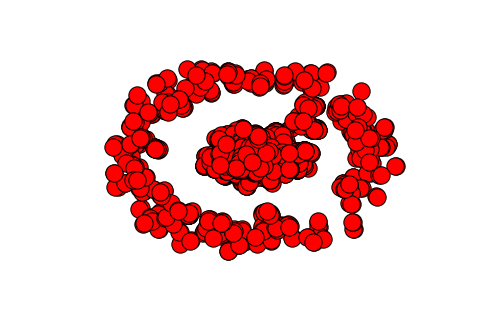

In [13]:
nx.draw(G)
plt.show()

In [10]:
nx.number_of_nodes(G)

4503

In [11]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [12]:
nx.number_of_nodes(Gc)

3907

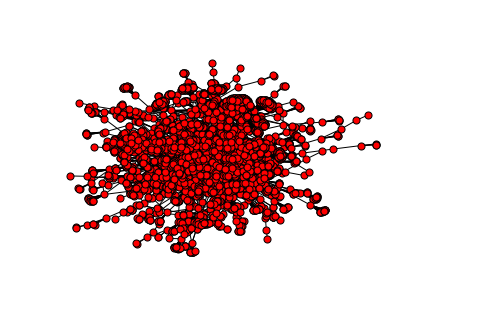

In [18]:
nx.draw(Gc, node_size=50)
plt.show()